In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Save original data as a variable to be read 
original_data = "../original_dataset.csv"

In [4]:
# Read our Data file with the pandas library
original_data_df = pd.read_csv(original_data)
original_data_df.head()

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
0,0,0,0,US,United States,2019,NaN,6900.630354,3745538.0,908266078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2019,NaN,9917.232898,80440.0,13636816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,815.0,156132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,2827.0,576496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,1005,AL,Barbour County,2019,1.0,9586.165037,451.0,72222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Pull columns which will be needed for future analysis

new_data = original_data_df[["state", "year", "v023_numerator", "v023_denominator", "v085_numerator", "v085_denominator", "v003_numerator", "v003_denominator", "v122_numerator", "v122_denominator", "v060_numerator", "v060_denominator", "v061_numerator", "v061_denominator", "v155_rawvalue", "v011_numerator", "v011_denominator", "v144_rawvalue", "v043_numerator", "v043_denominator", "v135_numerator", "v135_denominator", "v015_numerator", "v015_denominator", "v148_numerator", "v148_denominator", "v145_rawvalue", "v138_numerator", "v138_denominator", "v001_numerator", "v001_denominator", "v147_rawvalue", "v037_numerator", "v037_denominator", "v005_rawvalue"]]
new_data.head()

,state,year,v023_numerator,v023_denominator,v085_numerator,v085_denominator,v003_numerator,v003_denominator,v122_numerator,v122_denominator,...,v148_denominator,v145_rawvalue,v138_numerator,v138_denominator,v001_numerator,v001_denominator,v147_rawvalue,v037_numerator,v037_denominator,v005_rawvalue
0,US,2019,6994555.0,160588786.0,26749668.0,267259921.0,23533400.0,194808251.0,3559597.0,76219054.0,...,1.605251e+09,NaN,186273.0,970265511.0,3745538.0,908266078.0,79.063850,2230947.0,27579119.0,NaN
1,AL,2019,95342.0,2168448.0,427972.0,3973078.0,401044.0,2895627.0,30253.0,1135031.0,...,2.428012e+07,0.145488,2327.0,14597026.0,80440.0,13636816.0,75.413035,41895.0,412942.0,5496.0
2,AL,2019,1001.0,25909.0,4002.0,47077.0,3686.0,33628.0,351.0,14175.0,...,2.769080e+05,0.126384,16.0,166267.0,815.0,156132.0,76.330589,377.0,4448.0,6599.0
3,AL,2019,3652.0,91567.0,17733.0,165740.0,16389.0,120771.0,1530.0,47251.0,...,1.020551e+06,0.128226,102.0,624900.0,2827.0,576496.0,78.599498,1299.0,15578.0,3833.0
4,AL,2019,486.0,8236.0,2252.0,17997.0,2105.0,12725.0,161.0,5549.0,...,1.316870e+05,0.146323,NaN,NaN,451.0,72222.0,75.779457,215.0,1963.0,4736.0


In [6]:
# Renamed Columns
renamed_new = new_data.rename(columns={"state" :"State", 
                                       "year" :"Year", 
                                       "v023_numerator": "Unemployment_Num", 
                                       "v023_denominator":"Unemployment_Den", 
                                       "v085_numerator": "Uninsured_Num", 
                                       "v085_denominator":"Uninsured_Den", 
                                       "v003_numerator": "Uninsured_Adults_Num", 
                                       "v003_denominator": "Uninsured_Adults_Den", 
                                       "v122_numerator": "Uninsured_Children_Num", 
                                       "v122_denominator": "Uninsured_Children_Den", 
                                       "v060_numerator": "Diabetes_Prevalence_Num", 
                                       "v060_denominator":"Diabetes_Prevalence_Den", 
                                       "v061_numerator": "HIV_Prevalence_Num", 
                                       "v061_denominator": "HIV_Prevalence_Den", 
                                       "v155_rawvalue": "Flu_Vaccination_Raw", 
                                       "v011_numerator": "Adult_Obesity_Num", 
                                       "v011_denominator": "Adult_Obesity_Den", 
                                       "v144_rawvalue": "Frequent_Physical_Distress_Raw", 
                                       "v043_numerator": "Violent_Crimes_Num", 
                                       "v043_denominator": "Violent_Crimes_Den", 
                                       "v135_numerator": "Injury_Deaths_Num", 
                                       "v135_denominator": "Injury_Deaths_Den", 
                                       "v015_numerator": "Homicides_Num", 
                                       "v015_denominator": "Homicides_Den", 
                                       "v148_numerator": "Firearms_Fatality_Num", 
                                       "v148_denominator": "Firearms_Fatality_Den", 
                                       "v145_rawvalue": "Frequent_Mental_Distress_Raw", 
                                       "v138_numerator": "Drugs_Overdose_Death_Num", 
                                       "v138_denominator":"Drugs_Overdose_Death_Den", 
                                       "v001_numerator":"Premature_Deaths_Num", 
                                       "v001_denominator":"Premature_Deaths_Den", 
                                       "v147_rawvalue": "Life_Expectancy_Raw", 
                                       "v037_numerator":"Low_Birth_Weight_Num", 
                                       "v037_denominator": "Low_Birth_Weight_Den", 
                                       "v005_rawvalue":"Preventable_Hospital_Stays_Raw"
})

renamed_new.head()

,State,Year,Unemployment_Num,Unemployment_Den,Uninsured_Num,Uninsured_Den,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Children_Num,Uninsured_Children_Den,...,Firearms_Fatality_Den,Frequent_Mental_Distress_Raw,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Premature_Deaths_Num,Premature_Deaths_Den,Life_Expectancy_Raw,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Preventable_Hospital_Stays_Raw
0,US,2019,6994555.0,160588786.0,26749668.0,267259921.0,23533400.0,194808251.0,3559597.0,76219054.0,...,1.605251e+09,NaN,186273.0,970265511.0,3745538.0,908266078.0,79.063850,2230947.0,27579119.0,NaN
1,AL,2019,95342.0,2168448.0,427972.0,3973078.0,401044.0,2895627.0,30253.0,1135031.0,...,2.428012e+07,0.145488,2327.0,14597026.0,80440.0,13636816.0,75.413035,41895.0,412942.0,5496.0
2,AL,2019,1001.0,25909.0,4002.0,47077.0,3686.0,33628.0,351.0,14175.0,...,2.769080e+05,0.126384,16.0,166267.0,815.0,156132.0,76.330589,377.0,4448.0,6599.0
3,AL,2019,3652.0,91567.0,17733.0,165740.0,16389.0,120771.0,1530.0,47251.0,...,1.020551e+06,0.128226,102.0,624900.0,2827.0,576496.0,78.599498,1299.0,15578.0,3833.0
4,AL,2019,486.0,8236.0,2252.0,17997.0,2105.0,12725.0,161.0,5549.0,...,1.316870e+05,0.146323,NaN,NaN,451.0,72222.0,75.779457,215.0,1963.0,4736.0


In [7]:
# Dropping Row
drop_us = renamed_new.drop([0])
drop_us.head()

,State,Year,Unemployment_Num,Unemployment_Den,Uninsured_Num,Uninsured_Den,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Children_Num,Uninsured_Children_Den,...,Firearms_Fatality_Den,Frequent_Mental_Distress_Raw,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Premature_Deaths_Num,Premature_Deaths_Den,Life_Expectancy_Raw,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Preventable_Hospital_Stays_Raw
1,AL,2019,95342.0,2168448.0,427972.0,3973078.0,401044.0,2895627.0,30253.0,1135031.0,...,24280125.0,0.145488,2327.0,14597026.0,80440.0,13636816.0,75.413035,41895.0,412942.0,5496.0
2,AL,2019,1001.0,25909.0,4002.0,47077.0,3686.0,33628.0,351.0,14175.0,...,276908.0,0.126384,16.0,166267.0,815.0,156132.0,76.330589,377.0,4448.0,6599.0
3,AL,2019,3652.0,91567.0,17733.0,165740.0,16389.0,120771.0,1530.0,47251.0,...,1020551.0,0.128226,102.0,624900.0,2827.0,576496.0,78.599498,1299.0,15578.0,3833.0
4,AL,2019,486.0,8236.0,2252.0,17997.0,2105.0,12725.0,161.0,5549.0,...,131687.0,0.146323,NaN,NaN,451.0,72222.0,75.779457,215.0,1963.0,4736.0
5,AL,2019,373.0,8506.0,1646.0,17004.0,1532.0,12458.0,125.0,4772.0,...,112912.0,0.128540,15.0,67894.0,445.0,63653.0,73.928271,202.0,1819.0,5998.0


In [8]:
# Create a new dataframe 
updated_data = pd.DataFrame(data = drop_us)
updated_data.head()

,State,Year,Unemployment_Num,Unemployment_Den,Uninsured_Num,Uninsured_Den,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Children_Num,Uninsured_Children_Den,...,Firearms_Fatality_Den,Frequent_Mental_Distress_Raw,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Premature_Deaths_Num,Premature_Deaths_Den,Life_Expectancy_Raw,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Preventable_Hospital_Stays_Raw
1,AL,2019,95342.0,2168448.0,427972.0,3973078.0,401044.0,2895627.0,30253.0,1135031.0,...,24280125.0,0.145488,2327.0,14597026.0,80440.0,13636816.0,75.413035,41895.0,412942.0,5496.0
2,AL,2019,1001.0,25909.0,4002.0,47077.0,3686.0,33628.0,351.0,14175.0,...,276908.0,0.126384,16.0,166267.0,815.0,156132.0,76.330589,377.0,4448.0,6599.0
3,AL,2019,3652.0,91567.0,17733.0,165740.0,16389.0,120771.0,1530.0,47251.0,...,1020551.0,0.128226,102.0,624900.0,2827.0,576496.0,78.599498,1299.0,15578.0,3833.0
4,AL,2019,486.0,8236.0,2252.0,17997.0,2105.0,12725.0,161.0,5549.0,...,131687.0,0.146323,NaN,NaN,451.0,72222.0,75.779457,215.0,1963.0,4736.0
5,AL,2019,373.0,8506.0,1646.0,17004.0,1532.0,12458.0,125.0,4772.0,...,112912.0,0.128540,15.0,67894.0,445.0,63653.0,73.928271,202.0,1819.0,5998.0


In [9]:
Unemployment_Num = updated_data.groupby(["State"]).sum()["Unemployment_Num"]
Unemployment_Den = updated_data.groupby(["State"]).sum()["Unemployment_Den"]
Unemployment_Perc = Unemployment_Num / Unemployment_Den

Uninsured_Num = updated_data.groupby(["State"]).sum()["Uninsured_Num"]
Uninsured_Den = updated_data.groupby(["State"]).sum()["Uninsured_Den"]
Uninsured_Perc = Uninsured_Num / Uninsured_Den

Uninsured_Adults_Num = updated_data.groupby(["State"]).sum()["Uninsured_Adults_Num"]
Uninsured_Adults_Den = updated_data.groupby(["State"]).sum()["Uninsured_Adults_Den"]
Uninsured_Adults_Perc = Uninsured_Adults_Num / Uninsured_Adults_Den

Uninsured_Children_Num = updated_data.groupby(["State"]).sum()["Uninsured_Children_Num"]
Uninsured_Children_Den = updated_data.groupby(["State"]).sum()["Uninsured_Children_Den"]
Uninsured_Children_Perc = Uninsured_Children_Num / Uninsured_Children_Den

Diabetes_Prevalence_Num = updated_data.groupby(["State"]).sum()["Diabetes_Prevalence_Num"]
Diabetes_Prevalence_Den = updated_data.groupby(["State"]).sum()["Diabetes_Prevalence_Den"]
Diabetes_Prevalence_Perc = Diabetes_Prevalence_Num / Diabetes_Prevalence_Den

HIV_Prevalence_Num = updated_data.groupby(["State"]).sum()["HIV_Prevalence_Num"]
HIV_Prevalence_Den = updated_data.groupby(["State"]).sum()["HIV_Prevalence_Den"]
HIV_Prevalence_Perc = HIV_Prevalence_Num / HIV_Prevalence_Den

Flu_Vaccination_Perc = updated_data.groupby(["State"]).sum()["Flu_Vaccination_Raw"]

Adult_Obesity_Num = updated_data.groupby(["State"]).sum()["Adult_Obesity_Num"]
Adult_Obesity_Den = updated_data.groupby(["State"]).sum()["Adult_Obesity_Den"]
Adult_Obesity_Perc = Adult_Obesity_Num / Adult_Obesity_Den

Frequent_Physical_Distress_Perc = updated_data.groupby(["State"]).sum()["Frequent_Physical_Distress_Raw"]

Violent_Crimes_Num = updated_data.groupby(["State"]).sum()["Violent_Crimes_Num"]
Violent_Crimes_Den = updated_data.groupby(["State"]).sum()["Violent_Crimes_Den"]
Violent_Crimes_Perc = Violent_Crimes_Num / Violent_Crimes_Den

Injury_Deaths_Num = updated_data.groupby(["State"]).sum()["Injury_Deaths_Num"]
Injury_Deaths_Den = updated_data.groupby(["State"]).sum()["Injury_Deaths_Den"]
Injury_Deaths_Perc = Injury_Deaths_Num / Injury_Deaths_Den

Homicides_Num = updated_data.groupby(["State"]).sum()["Homicides_Num"]
Homicides_Den = updated_data.groupby(["State"]).sum()["Homicides_Den"]
Homicides_Perc = Homicides_Num / Homicides_Den

Firearms_Fatality_Num = updated_data.groupby(["State"]).sum()["Firearms_Fatality_Num"]
Firearms_Fatality_Den = updated_data.groupby(["State"]).sum()["Firearms_Fatality_Den"]
Firearms_Fatality_Perc = Firearms_Fatality_Num / Firearms_Fatality_Den

Frequent_Mental_Distress_Perc = updated_data.groupby(["State"]).sum()["Frequent_Mental_Distress_Raw"]

Drugs_Overdose_Death_Num = updated_data.groupby(["State"]).sum()["Drugs_Overdose_Death_Num"]
Drugs_Overdose_Death_Den = updated_data.groupby(["State"]).sum()["Drugs_Overdose_Death_Den"]
Drugs_Overdose_Death_Perc = Drugs_Overdose_Death_Num / Drugs_Overdose_Death_Den

Premature_Deaths_Num = updated_data.groupby(["State"]).sum()["Premature_Deaths_Num"]
Premature_Deaths_Den = updated_data.groupby(["State"]).sum()["Premature_Deaths_Den"]
Premature_Deaths_Perc = Premature_Deaths_Num / Premature_Deaths_Den

Life_Expectancy_Perc = updated_data.groupby(["State"]).sum()["Life_Expectancy_Raw"]

Low_Birth_Weight_Num = updated_data.groupby(["State"]).sum()["Low_Birth_Weight_Num"]
Low_Birth_Weight_Den = updated_data.groupby(["State"]).sum()["Low_Birth_Weight_Den"]
Low_Birth_Weight_Perc = Low_Birth_Weight_Num / Low_Birth_Weight_Den

Preventable_Hospital_Stays_Perc = updated_data.groupby(["State"]).sum()["Preventable_Hospital_Stays_Raw"]

In [10]:
data = [Unemployment_Num, Unemployment_Den, Unemployment_Perc, Uninsured_Num, Uninsured_Den, Uninsured_Perc, Uninsured_Adults_Num, Uninsured_Adults_Den,
Uninsured_Adults_Perc, Uninsured_Children_Num, Uninsured_Children_Den, Uninsured_Children_Perc, Diabetes_Prevalence_Num, Diabetes_Prevalence_Den,
Diabetes_Prevalence_Perc, HIV_Prevalence_Num, HIV_Prevalence_Den, HIV_Prevalence_Perc, Flu_Vaccination_Perc, Adult_Obesity_Num,
Adult_Obesity_Den, Adult_Obesity_Perc, Frequent_Physical_Distress_Perc, Violent_Crimes_Num, Violent_Crimes_Den, Violent_Crimes_Perc,
Injury_Deaths_Num, Injury_Deaths_Den, Injury_Deaths_Perc, Homicides_Num, Homicides_Den, Homicides_Perc, Firearms_Fatality_Num,
Firearms_Fatality_Den, Firearms_Fatality_Perc, Frequent_Mental_Distress_Perc, Drugs_Overdose_Death_Num, Drugs_Overdose_Death_Den,
Drugs_Overdose_Death_Perc, Premature_Deaths_Num, Premature_Deaths_Den, Premature_Deaths_Perc, Life_Expectancy_Perc, Low_Birth_Weight_Num,
Low_Birth_Weight_Den, Low_Birth_Weight_Perc, Preventable_Hospital_Stays_Perc]

state_df = pd.DataFrame (data)
state_df = state_df.transpose()
state_df.head()

,Unemployment_Num,Unemployment_Den,Unnamed 0,Uninsured_Num,Uninsured_Den,Unnamed 1,Uninsured_Adults_Num,Uninsured_Adults_Den,Unnamed 2,Uninsured_Children_Num,...,Drugs_Overdose_Death_Den,Unnamed 11,Premature_Deaths_Num,Premature_Deaths_Den,Unnamed 12,Life_Expectancy_Raw,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Unnamed 13,Preventable_Hospital_Stays_Raw
State,,,,,,,,,,,,,,,,,,,,,
AK,51956.0,725572.0,0.071607,201574.0,1299028.0,0.155173,163858.0,929122.0,0.176358,40588.0,...,3995795.0,0.000186,16598.0,4269456.0,0.003888,2026.160114,9168.0,155451.0,0.058977,51269.0
AL,190684.0,4336896.0,0.043968,855944.0,7946156.0,0.107718,802088.0,5791254.0,0.138500,60506.0,...,27416637.0,0.000165,160880.0,27273632.0,0.005899,5075.180408,83790.0,825884.0,0.101455,396551.0
AR,99670.0,2708544.0,0.036798,456684.0,4855014.0,0.094064,403944.0,3474804.0,0.116249,58504.0,...,15808357.0,0.000143,95680.0,16718408.0,0.005723,5688.222428,47988.0,535980.0,0.089533,416925.0
AZ,322628.0,6625442.0,0.048695,1339638.0,11226354.0,0.119330,1104656.0,8018912.0,0.137756,259282.0,...,41522215.0,0.000202,156792.0,38639850.0,0.004058,1259.244082,84784.0,1191676.0,0.071147,51932.0
CA,1837766.0,38623920.0,0.047581,5574610.0,66523356.0,0.083799,5053256.0,48571872.0,0.104037,587374.0,...,235691015.0,0.000120,687182.0,222305892.0,0.003091,4647.506674,469061.0,6909720.0,0.067884,190869.0


In [11]:
state_df.columns

Index(['Unemployment_Num', 'Unemployment_Den', 'Unnamed 0', 'Uninsured_Num',
       'Uninsured_Den', 'Unnamed 1', 'Uninsured_Adults_Num',
       'Uninsured_Adults_Den', 'Unnamed 2', 'Uninsured_Children_Num',
       'Uninsured_Children_Den', 'Unnamed 3', 'Diabetes_Prevalence_Num',
       'Diabetes_Prevalence_Den', 'Unnamed 4', 'HIV_Prevalence_Num',
       'HIV_Prevalence_Den', 'Unnamed 5', 'Flu_Vaccination_Raw',
       'Adult_Obesity_Num', 'Adult_Obesity_Den', 'Unnamed 6',
       'Frequent_Physical_Distress_Raw', 'Violent_Crimes_Num',
       'Violent_Crimes_Den', 'Unnamed 7', 'Injury_Deaths_Num',
       'Injury_Deaths_Den', 'Unnamed 8', 'Homicides_Num', 'Homicides_Den',
       'Unnamed 9', 'Firearms_Fatality_Num', 'Firearms_Fatality_Den',
       'Unnamed 10', 'Frequent_Mental_Distress_Raw',
       'Drugs_Overdose_Death_Num', 'Drugs_Overdose_Death_Den', 'Unnamed 11',
       'Premature_Deaths_Num', 'Premature_Deaths_Den', 'Unnamed 12',
       'Life_Expectancy_Raw', 'Low_Birth_Weight_Num',

In [12]:
state = state_df.rename(index = str, columns = {
    "Unnamed 0" : "Unemployment_Perc",
    "Unnamed 1" : "Uninsured_Perc",
    "Unnamed 2" : "Uninsured_Adults_Perc",
    "Unnamed 3" : "Uninsured_Children_Perc",
    "Unnamed 4" : "Diabetes_Prevalence_Perc",
    "Unnamed 5" : "HIV_Prevalence_Perc",
    "Unnamed 6" : "Flu_Vaccination_Perc",
    "Unnamed 7" : "Adult_Obesity_Perc",
    "Unnamed 8" : "Frequent_Physical_Distress_Perc",
    "Unnamed 9" : "Violent_Crimes_Perc",
    "Unnamed 10" : "Injury_Deaths_Perc",
    "Unnamed 11" : "Homicides_Perc",
    "Unnamed 12" : "Firearms_Fatalities_Perc",
    "Unnamed 13" : "Drugs_Overdose_Deaths_Perc",
    "Unnamed 14" : "Premature_Deaths_Perc",
    "Unnamed 15" : "Life_Expectancy_Perc",
    "Unnamed 16" : "Low_Birth_Weight_Perc",
    "Unnamed 17" : "Preventable_Hospital_Stays_Perc"
})


state.head()

,Unemployment_Num,Unemployment_Den,Unemployment_Perc,Uninsured_Num,Uninsured_Den,Uninsured_Perc,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Adults_Perc,Uninsured_Children_Num,...,Drugs_Overdose_Death_Den,Homicides_Perc,Premature_Deaths_Num,Premature_Deaths_Den,Firearms_Fatalities_Perc,Life_Expectancy_Raw,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Drugs_Overdose_Deaths_Perc,Preventable_Hospital_Stays_Raw
State,,,,,,,,,,,,,,,,,,,,,
AK,51956.0,725572.0,0.071607,201574.0,1299028.0,0.155173,163858.0,929122.0,0.176358,40588.0,...,3995795.0,0.000186,16598.0,4269456.0,0.003888,2026.160114,9168.0,155451.0,0.058977,51269.0
AL,190684.0,4336896.0,0.043968,855944.0,7946156.0,0.107718,802088.0,5791254.0,0.138500,60506.0,...,27416637.0,0.000165,160880.0,27273632.0,0.005899,5075.180408,83790.0,825884.0,0.101455,396551.0
AR,99670.0,2708544.0,0.036798,456684.0,4855014.0,0.094064,403944.0,3474804.0,0.116249,58504.0,...,15808357.0,0.000143,95680.0,16718408.0,0.005723,5688.222428,47988.0,535980.0,0.089533,416925.0
AZ,322628.0,6625442.0,0.048695,1339638.0,11226354.0,0.119330,1104656.0,8018912.0,0.137756,259282.0,...,41522215.0,0.000202,156792.0,38639850.0,0.004058,1259.244082,84784.0,1191676.0,0.071147,51932.0
CA,1837766.0,38623920.0,0.047581,5574610.0,66523356.0,0.083799,5053256.0,48571872.0,0.104037,587374.0,...,235691015.0,0.000120,687182.0,222305892.0,0.003091,4647.506674,469061.0,6909720.0,0.067884,190869.0


In [13]:
state.to_csv("state_clean_data.csv")

In [14]:
# Save state clean data as a variable to be read 
state_clean_data = "state_clean_data.csv"

In [15]:
# Read our Data file with the pandas library
state_clean_data = pd.read_csv(state_clean_data)
state_clean_data.head()

,State,Unemployment_Num,Unemployment_Den,Unemployment_Perc,Uninsured_Num,Uninsured_Den,Uninsured_Perc,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Adults_Perc,...,Drugs_Overdose_Death_Den,Homicides_Perc,Premature_Deaths_Num,Premature_Deaths_Den,Firearms_Fatalities_Perc,Life_Expectancy_Raw,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Drugs_Overdose_Deaths_Perc,Preventable_Hospital_Stays_Raw
0,AK,51956.0,725572.0,0.071607,201574.0,1299028.0,0.155173,163858.0,929122.0,0.176358,...,3995795.0,0.000186,16598.0,4269456.0,0.003888,2026.160114,9168.0,155451.0,0.058977,51269.0
1,AL,190684.0,4336896.0,0.043968,855944.0,7946156.0,0.107718,802088.0,5791254.0,0.138500,...,27416637.0,0.000165,160880.0,27273632.0,0.005899,5075.180408,83790.0,825884.0,0.101455,396551.0
2,AR,99670.0,2708544.0,0.036798,456684.0,4855014.0,0.094064,403944.0,3474804.0,0.116249,...,15808357.0,0.000143,95680.0,16718408.0,0.005723,5688.222428,47988.0,535980.0,0.089533,416925.0
3,AZ,322628.0,6625442.0,0.048695,1339638.0,11226354.0,0.119330,1104656.0,8018912.0,0.137756,...,41522215.0,0.000202,156792.0,38639850.0,0.004058,1259.244082,84784.0,1191676.0,0.071147,51932.0
4,CA,1837766.0,38623920.0,0.047581,5574610.0,66523356.0,0.083799,5053256.0,48571872.0,0.104037,...,235691015.0,0.000120,687182.0,222305892.0,0.003091,4647.506674,469061.0,6909720.0,0.067884,190869.0


In [16]:
health_outcomes_data = state_clean_data [['State',
                                          'Unemployment_Num',
                                          'Unemployment_Den',
                                          'Unemployment_Perc',
                                          'Diabetes_Prevalence_Num',
                                          'Diabetes_Prevalence_Den',
                                          'Diabetes_Prevalence_Perc',
                                          'HIV_Prevalence_Num',
                                          'HIV_Prevalence_Den',
                                          'HIV_Prevalence_Perc'
                                         ]]


# health_outcomes_data["Frequent_Physical_Distress_Raw"] = health_outcomes_data["Frequent_Physical_Distress_Raw"].map("{:.2f}".format)
# health_outcomes_data["Frequent_Mental_Distress_Raw"] = health_outcomes_data["Frequent_Mental_Distress_Raw"].map("{:.2f}".format)
# health_outcomes_data["Diabetes_Prevalence_Perc"] = health_outcomes_data["Diabetes_Prevalence_Perc"].map("{:.2%}".format)
# health_outcomes_data["HIV_Prevalence_Perc"] = health_outcomes_data["HIV_Prevalence_Perc"].map("{:.2%}".format)


health_outcomes_data.head()

,State,Unemployment_Num,Unemployment_Den,Unemployment_Perc,Diabetes_Prevalence_Num,Diabetes_Prevalence_Den,Diabetes_Prevalence_Perc,HIV_Prevalence_Num,HIV_Prevalence_Den,HIV_Prevalence_Perc
0,AK,51956.0,725572.0,0.071607,81062.0,1.063955e+06,0.076189,1235.0,1126303.0,0.001097
1,AL,190684.0,4336896.0,0.043968,1010874.0,7.257881e+06,0.139279,24458.0,8145014.0,0.003003
2,AR,99670.0,2708544.0,0.036798,585278.0,4.389497e+06,0.133336,10499.0,4920366.0,0.002134
3,AZ,322628.0,6625442.0,0.048695,978342.0,1.002127e+07,0.097627,30367.0,11305039.0,0.002686
4,CA,1837766.0,38623920.0,0.047581,4908040.0,5.775035e+07,0.084987,238654.0,64838003.0,0.003681


In [17]:
unemp_prem_corr = health_outcomes_data.corr().loc['Diabetes_Prevalence_Perc','Unemployment_Perc']
unemp_prem_corr

0.19049788077182817

In [18]:
unemp_prem_corr = health_outcomes_data.corr().loc['HIV_Prevalence_Perc','Unemployment_Perc']
unemp_prem_corr

0.3848561005115613

In [19]:
# Filter the DataFrame down only to those columns to chart
health_outcomes = health_outcomes_data[["State",'Diabetes_Prevalence_Perc','HIV_Prevalence_Perc']]

# Set the index to be "State" so they will be used as labels
health_outcomes_state = health_outcomes.set_index("State")

# health_outcomes1=health_outcomes1.astype(float)

health_outcomes_state_sort = health_outcomes_state.sort_values(by=['Diabetes_Prevalence_Perc'], ascending=True)

health_outcomes_state_sort.head()

,Diabetes_Prevalence_Perc,HIV_Prevalence_Perc
State,,
CO,0.062227,0.002530
UT,0.071896,0.001166
AK,0.076189,0.001097
MN,0.081692,0.001731
DC,0.082000,0.025902


In [20]:
# Filter the DataFrame down only to those columns to chart
Unemployment_Diabetes_Prevalence = health_outcomes_data[["State",'Unemployment_Perc','Diabetes_Prevalence_Perc']]

# Set the index to be "State" so they will be used as labels
Unemployment_Diabetes_Prevalence = Unemployment_Diabetes_Prevalence.set_index("State")

# health_outcomes1=health_outcomes1.astype(float)

Unemployment_Diabetes_Prevalence_sort = Unemployment_Diabetes_Prevalence.sort_values(by=['Unemployment_Perc'], ascending=True)

Unemployment_Diabetes_Prevalence_sort.head()

,Unemployment_Perc,Diabetes_Prevalence_Perc
State,,
HI,0.023602,0.098305
ND,0.026040,0.084955
NH,0.026714,0.093086
CO,0.028352,0.062227
NE,0.029366,0.089795


<IPython.core.display.Javascript object>


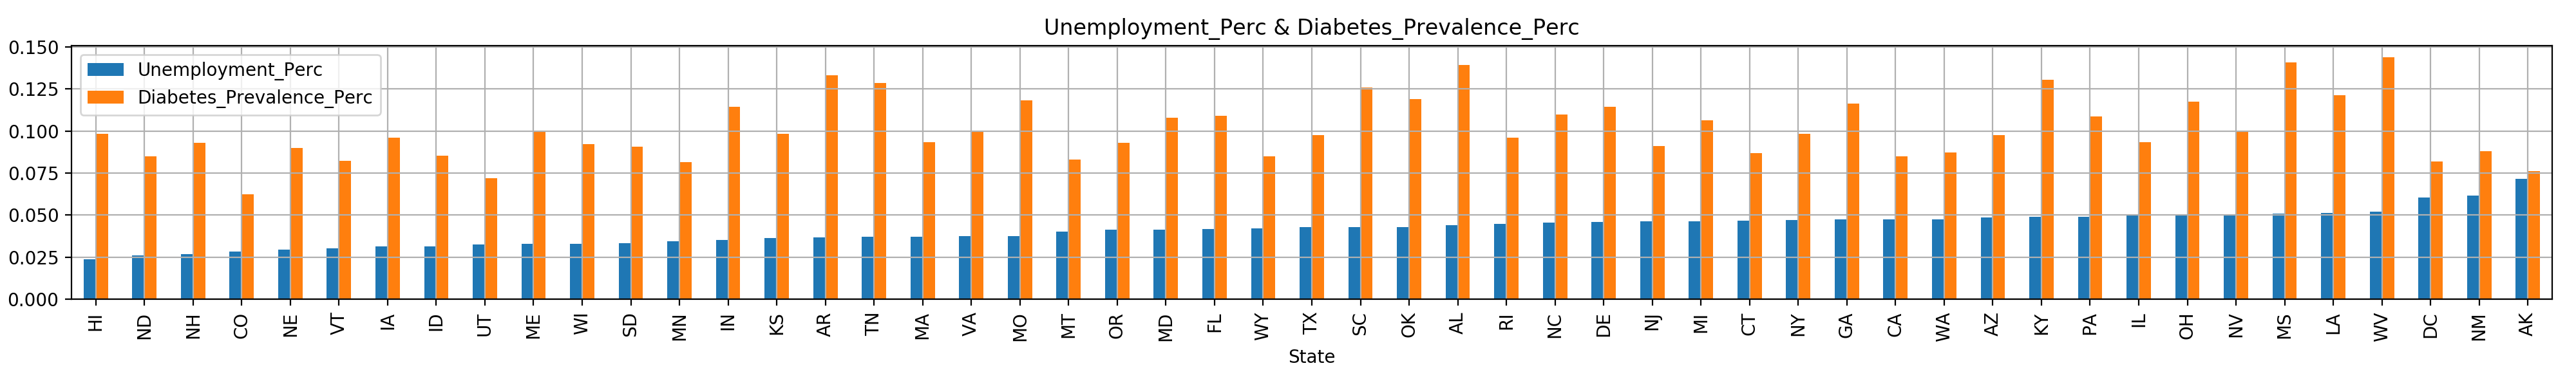

In [21]:
# Use DataFrame.plot() in order to create a bar chart of the data
Unemployment_Diabetes_Prevalence_sort.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Unemployment_Perc & Diabetes_Prevalence_Perc")

# Set a grid on the plot
plt.grid()

plt.show()
plt.tight_layout()

In [22]:
plt.savefig("Unemployment_Perc & Diabetes_Prevalence_Perc")

In [23]:
# Filter the DataFrame down only to those columns to chart
Unemployment_HIV_Prevalence = health_outcomes_data[["State",'Unemployment_Perc','HIV_Prevalence_Perc']]

# Set the index to be "State" so they will be used as labels
Unemployment_HIV_Prevalence = Unemployment_HIV_Prevalence.set_index("State")

# health_outcomes1=health_outcomes1.astype(float)

Unemployment_HIV_Prevalence_sort = Unemployment_HIV_Prevalence.sort_values(by=['Unemployment_Perc'], ascending=True)

Unemployment_HIV_Prevalence_sort.head()

,Unemployment_Perc,HIV_Prevalence_Perc
State,,
HI,0.023602,0.002255
ND,0.026040,0.000571
NH,0.026714,0.001065
CO,0.028352,0.002530
NE,0.029366,0.001028


<IPython.core.display.Javascript object>


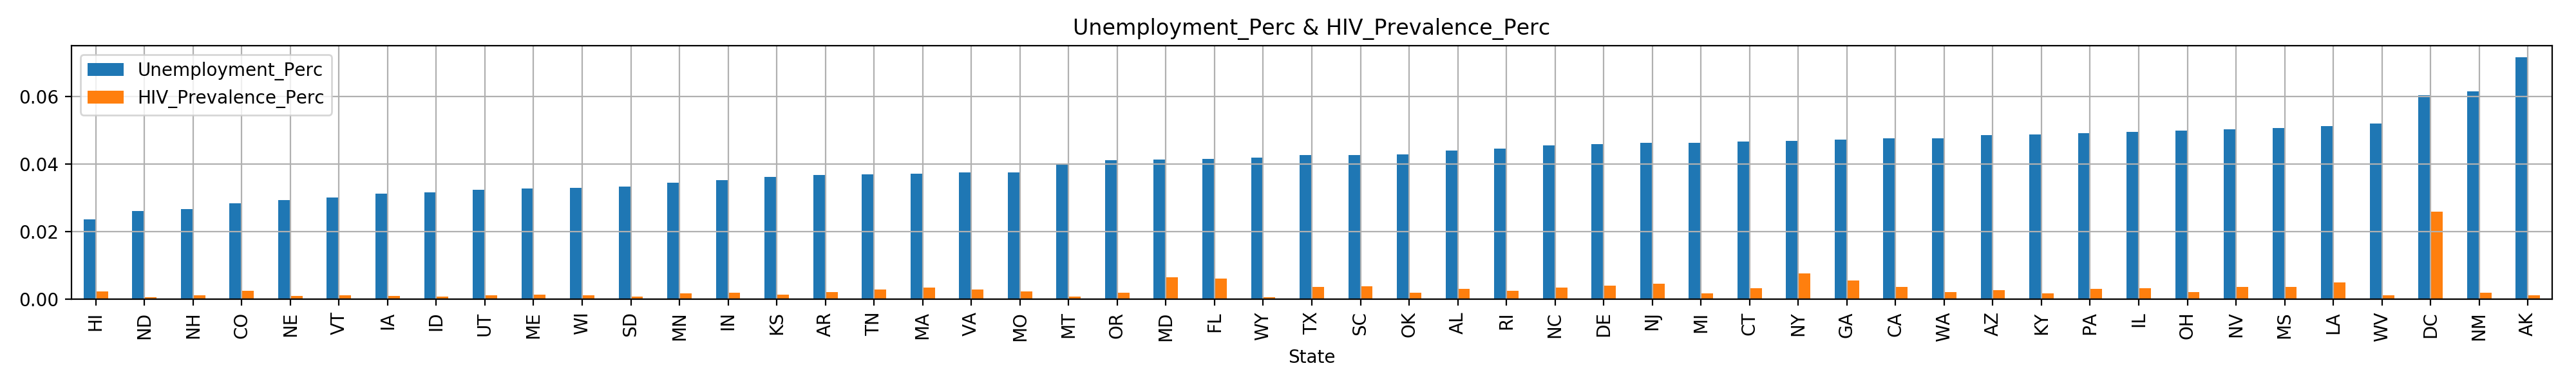

In [24]:
# Use DataFrame.plot() in order to create a bar chart of the data
Unemployment_HIV_Prevalence_sort.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Unemployment_Perc & HIV_Prevalence_Perc")

# Set a grid on the plot
plt.grid()

plt.show()
plt.tight_layout()

In [25]:
plt.savefig("Unemployment_Perc & HIV_Prevalence_Perc")